# Programming Assignment 5 - Logistic Regression 

## In this assignment:

You'll employ gradient ascent to determine weights for a logistic regression problem focused on diagnosing breast cancer.

### Dataset Overview:

The **Breast Cancer Wisconsin dataset** is a widely-recognized collection of features manually recorded by physicians from fine needle aspiration samples. The primary objective is to determine whether the cells are benign or malignant based on these features. 

**Dataset details:** [Breast Cancer Wisconsin dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin)

Each sample from the dataset is derived from a digitized image of a fine needle aspirate (FNA) of a breast mass. These images are processed to extract characteristics of cell nuclei, which are instrumental in the diagnostic process.

### Features:

The dataset consists of ten real-valued features that provide various measurements related to the cell nucleus:

1. **Radius:** Mean of distances from the center to points on the perimeter.
2. **Texture:** Standard deviation of gray-scale values.
3. **Perimeter**
4. **Area**
5. **Smoothness:** Local variation in radius lengths.
6. **Compactness:** \( \frac{\text{perimeter}^2}{\text{area}} - 1.0 \)
7. **Concavity:** Severity of concave portions of the contour.
8. **Concave Points:** Number of concave portions of the contour.
9. **Symmetry**
10. **Fractal Dimension:** "Coastline approximation" - 1.

### Task:

Your mission is to use logistic regression on the provided features to predict whether a tumor is benign or malignant. Successfully doing so can greatly aid in early diagnosis, ultimately leading to saved lives.


## Step 1:  Getting, preprocessing, and understanding the dataset

### Importing the standard libraries

### Essential Libraries

- **NumPy**: A library for numerical operations in Python.
- **Matplotlib**: Provides a way to visualize data.

### Scikit-learn Utilities

- **load_breast_cancer**: Dataset included in Scikit-learn for breast cancer classification.
- **preprocessing**: Contains methods for preparing data before applying learning algorithms.
- **train_test_split**: A utility function to split data into training and testing sets.

> **Note**: Using the `%matplotlib inline` command ensures that Matplotlib visualizations are rendered directly within the notebook.


In [1]:
# Essential libraries
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn utilities
from sklearn.datasets import load_breast_cancer 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

# Set up matplotlib for inline display
%matplotlib inline

### Importing the dataset

In [2]:
# Loading the dataset
cancer = load_breast_cancer()

y = cancer.target
X = cancer.data

In [3]:
# Printing the shape of data (X) and target (Y) values 
print(X.shape)
print(y.shape)

(569, 30)
(569,)


### Data Pre-Processing

### Splitting the Data
We divide our dataset into a training set and a testing set:
- **Training Set**: 75%
- **Testing Set**: 25%

Use the `train_test_split` function to achieve this split:
- Assign results to: `X_train`, `X_test`, `y_train`, `y_test`
- Set `random_state` to 42 to ensure reproducibility.




In [4]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

### Scaling the Data Using Standard Scaler

Since we are using gradient ascent, it's important to scale our data to ensure faster convergence. One of the most common methods to scale data is to use the `Standard Scaler`.

The `Standard Scaler` normalizes the features by subtracting the mean and scaling to unit variance. 

Using `Standard Scaler`, each feature will have a mean of 0 and a standard deviation of 1 post-scaling.


In [5]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# TODO - Print the shape of x_train and y_train 

print(X_train.shape)
print(y_train.shape)
##
 # When you print the shape of x_train, it should print (426, 30)
 # When you print the shape of y_train, it should print (426,)

(426, 30)
(426,)


#### Adding a Bias Term to $X_{\text{train}}$ and $X_{\text{test}}$
To account for the intercept term in our logistic regression model, we augment our feature matrices with a column of ones. This is often referred to as the bias term.

Given our original matrix:
$$X_{\text{train}}=\left[\begin{matrix}
x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\ddots & \vdots \\
x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$$

We add a column of ones:
$$ X_{\text{train}}=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots &\ddots & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$$

Similarly, we augment $X_{\text{test}}$ with a column of ones. This allows our algorithm to learn an intercept term without needing special handling.

In [10]:
# Appending a column of ones to x_train 

# Step 1: Create a column vector of ones (i.e. a vector of shape N',1)
ones = np.ones(X_train.shape[0]).reshape((X_train.shape[0], 1))

# Step 2: Append a column of ones in the beginning of x_train
X_train = np.hstack((ones, X_train))


# Now do the same for the test data
# Step 1: Create a column vector of ones (i.e. a vector of shape N",1)
ones = np.ones(X_test.shape[0]).reshape((X_test.shape[0], 1))

# Stemp 2: Append a column of ones in the beginning of x_test
X_test = np.hstack((ones, X_test))


# We can check that everything worked correctly by:
# Printing out the new dimensions
print("The trainng data has dimensions: ", X_train.shape, ". The testing data has dimensions: ",X_test.shape)

# Looking at the first two rows of X_train to check everything worked as expected
print(X_train[0:2])

The trainng data has dimensions:  (426, 31) . The testing data has dimensions:  (143, 31)
[[ 1.         -0.34913849 -1.43851335 -0.41172595 -0.39047943 -1.86366229
  -1.26860704 -0.82617052 -0.95286585 -1.72936805 -0.9415409  -0.86971355
  -1.35865347 -0.83481506 -0.57230673 -0.74586846 -0.65398319 -0.52583524
  -0.94677147 -0.53781728 -0.63449458 -0.54268486 -1.65565452 -0.58986401
  -0.52555985 -1.51066925 -0.89149994 -0.75021715 -0.91671059 -0.92508585
  -0.80841115]
 [ 1.         -0.20468665  0.31264011 -0.13367256 -0.27587995  1.07807258
   0.86354605  0.72631375  0.89844062  1.17876963  1.47437716 -0.04022275
  -0.50962253  0.10947722 -0.13472838 -0.52489487 -0.14934475  0.07460028
   0.23747244 -0.43028253  0.08289146  0.04148684  0.68989862  0.19412774
  -0.05193356  1.12941497  0.92394223  1.22221738  1.43655962  1.14955889
   1.56911143]]


### Reshaping the Target Vectors

due to the broadcasting feature in libraries like NumPy, if we're not careful with the shapes of our matrices, we might unintentionally compute the outer product instead of the desired inner product. This can lead to unexpected results and potential bugs in the algorithm. Reshaping the target vectors into 2D arrays helps prevent such issues.

In [11]:
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape((y_test.shape[0],1))

### Understanding the dataset

In [12]:
# Read through the description of the dataset by uncommenting the line of code below
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [15]:
# You can add your own code here to better understand the dataset
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 


# Step 2: Fitting the model

## Implementing Logistic Regression Using Gradient Ascent


You will perform the following steps:
* write the sigmoid function $\sigma(z)=\frac{1}{1+e^{-z}}$
* initialize ${\bf w}$
* prediction: write the function to compute the probability of every example in $X$ belonging to class one
* write the log likelihood function (see lecture notes for the formula)
* write the gradient ascent algorithm
* plot the likelihood v/s the number of iterations
* predict the class label (i.e. $0,1$) for every example in $X$ for a given ${\bf w}$ and $t$
* Evaluate your hypothesis by using your hypothesis to predict the label of the examples in the test set.  Using these predicted value you will then determine the precision, recall and F1 score of the test set


 
### Sigmoid($z$)
The first function you will write is sigmoid($z$)

sigmoid($z$) takes as input a column vector of real numbers, $z^T = [z_1, z_2, ..., z_{N'}]$, where $N'$ is the number of  examples

It should produce as output a column vector $\left[\frac{1}{1+e^{-z_1}},\frac{1}{1+e^{-z_2}},...,\frac{1}{1+e^{-z_{N'}}}\right]^T$

In [35]:
# TODO - Write the sigmoid function (z can be a scalar or a vector)
def sigmoid(z):
    ## TODO

    if(isinstance(z,int)):
        l=np.power(np.e,-z)
        k=1/(1+l)
        return k

    g=[]
    
    for i in range(len(z)):
        k=1/(1+np.power(np.e,-z[i]))
        g.append(k)
    


    g1=np.array(g)
    return g1
    ## 

In [36]:
# VERIFY - Sigmoid of 0 should be equal to 0.5
print(sigmoid(0))

0.5


### Initializing ${\bf w}$
For testing the next functions, we create a coefficient vector, ${\bf w}$.
We will initialize the coeffients to be $0$, i.e. ${\bf w}^T = [0,0,\ldots ,0]$ (We could have initialized ${\bf w}$ with any values.)

In [73]:
# Initialize parameters w
## TODO
w =np.zeros(X_train.shape[1])
##
w=w.reshape(X_train.shape[1],1)
print(w.shape)

(31, 1)


### Prediction Function
Complete the `hypothesis` function to compute the probability that each example in \(X\) belongs to class one. Specifically, it calculates:

$$\hat{\bf y}=\sigma(X{\bf w})$$

For a single example represented by the design matrix:

$$X=[1,x_1,x_2,\ldots,x_d]$$

and the corresponding weight vector:

$${\bf w}^T=[w_0,w_1,\ldots, w_d]$$

The function returns the logistic regression prediction:

$$h({\bf x})=\frac{1}{1+e^{-\left({w_{0}\cdot 1 +w_1\cdot x_1+\cdots +w_d\cdot x_d}\right)}}$$

Given a matrix with $N'$ examples:

$$X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots &\ddots & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$$

with the same weight vector, the function will return:

$$[h({\bf x}^{(1)}),h({\bf x}^{(2)}),\ldots, h({\bf x}^{(N')})]^T$$


In [87]:
# predict the probability that a patient has cancer 
# TODO - Write the hypothesis function 
def hypothesis(X , w):
    #TODO
    hh=[]
    ww=np.transpose(w)

    for i in range(len(X)):
        zz=np.dot(ww,X[i])
        hh.append(zz)


    g=sigmoid(hh)    
    return g
    ##

Before moving on, do a quick check that your function can accpet a matrix as an argument. 

In [112]:
# Compute y_hat using our training examples and w (w is still set to zero).  
# This is just a preliminary test of the hypotheis function


yhat = hypothesis(X_train, w)

# print the sizes of yhat and y as a first check that the function performed correctly

print(yhat.shape) # this should return (426, 1)
print(y_train.shape) # this should return (426,1)

(426, 1)
(426, 1)


### Log-Likelihood Function

Write the function to calculate the log-likelihood:

$$
\ell({\bf w})= \sum_{i=1}^{N'} y^{(i)} \ln(h({\bf x}^{(i)})) + (1 - y^{(i)}) \ln(1 - h({\bf x}^{(i)}))
$$

Where:

- **Input**:
  - Design matrix with $N'$ examples:
    
   $$
    X = \left[\begin{array}{cccc}
    1 & x^{(1)}_1 & \ldots & x^{(1)}_d \\
    1 & x^{(2)}_1 & \ldots & x^{(2)}_d \\
    \vdots & \vdots & \ddots & \vdots \\
    1 & x^{(N')}_1 & \ldots & x^{(N')}_d \\
    \end{array}\right]
   $$
    
  - Column vector of labels for $X$:
    
  $$
    {\bf y}^T = [y^{(1)}, y^{(2)}, \ldots, y^{(N')}]
   $$
  
- **Output**:
  - Log-likelihood value: $\ell({\bf w})$

In [100]:
# TODO - Write the log likelihood function 
def log_likelihood(X , y , w):
    ##TODO
    yh=hypothesis(X,w)
    s=0


    for i in range(len(yh)):
        a=np.log(yh[i])
        b=np.log(1-yh[i])
        c=y[i]*a
        d=(1-y[i])*b
        s=s+c+d



    


    log_likelihood=s
    ##
    return log_likelihood # you should return a real number, not a list containing a real number

Before moving on, do a quick check of your log_likelihood function

In [101]:
# VERIFY - The value should be equal to -295.2806989185367.
print(log_likelihood(X_train, y_train, w))

[-295.28069892]


# Gradient Ascent
Now write the code to perform gradient ascent.  You will use the update rule from the lecture notes.

In [160]:
# TODO - Write the gradient ascent function 
def Logistic_Regresion_Gradient_Ascent(X, y, learning_rate, num_iters):
    # We assume X has been augmented with a column of ones
    i=0
    # Initiating list to store values of log-likelihood after 100 iterations 
    log_likelihood_values = []
    # Initialize w to be a zero vector of shape x_train.shape[1],1
    w = np.zeros((X.shape[1], 1))
    
    for i in range(num_iters): 

     
    
   
    
     # Initialize N to the number of training examples
     N = X.shape[0] 
    
     # Gradient Ascent - local optimization technique
     ## TODO
    
     

     
         

     
     ##    
     # Every 100 iterations, store the log_likelihood for the current w
     if (i % 100) == 0:
            curr_log_likelihood =log_likelihood(X,y,w)
            log_likelihood_values.append(curr_log_likelihood)
            # On your own, monitor the learning process, print the iteration number, the log-likelihood, ...


     X_t=np.transpose(X)
     g=y-hypothesis(X,w)

     ee=np.matmul(X_t,g)
     ee=(learning_rate/N)*ee
     w=w+ee       
        
    return w, log_likelihood_values

### After completing the code above, run the following

In [166]:
learning_rate = 0.5
num_iters = 5000 # The number of iteratins to run the gradient ascent algorithm

w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_train, y_train, learning_rate, num_iters)

print(w)





[[-0.1056701 ]
 [-0.03553097]
 [-0.0536691 ]
 [ 0.17221516]
 [-0.31116366]
 [-0.45434972]
 [ 2.75131896]
 [-1.30570826]
 [-3.03314808]
 [ 1.16803283]
 [-0.85636742]
 [-3.72793978]
 [ 0.72266145]
 [-0.80953786]
 [-2.47051644]
 [-0.40297532]
 [ 0.53078335]
 [ 0.03099043]
 [-1.27545053]
 [ 1.31001975]
 [ 2.1018566 ]
 [-1.64716699]
 [-2.84431473]
 [-0.20035616]
 [-1.77971341]
 [-0.16157425]
 [ 0.73553297]
 [-2.45713669]
 [-1.31520556]
 [-2.99931319]
 [-0.38232592]]


# Plotting Log-Likelihood v/s Number of Iterations.

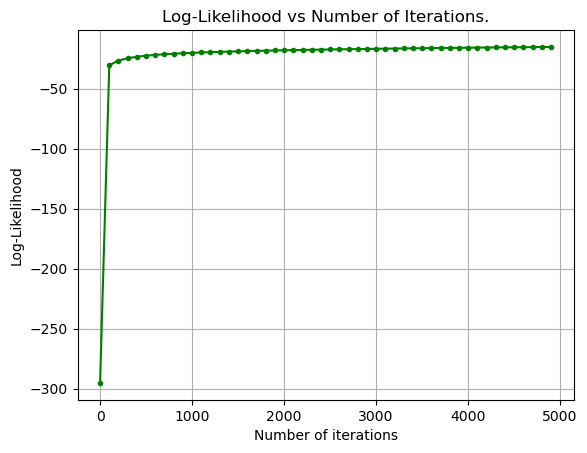

In [167]:
# Run this cell to plot Likelihood v/s Number of Iterations.
iters = np.array(range(0,num_iters,100))
plt.plot(iters,log_likelihood_values,'.-',color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Log-Likelihood')
plt.title("Log-Likelihood vs Number of Iterations.")
plt.grid()

You should see the likelihood increasing as number of Iterations increase.

# Step 3: Evaluating your model

In [187]:

yhat=hypothesis(X_test,w)

for i in range(len(yhat)):
    if(yhat[i]>0.5):
        yhat[i]=1
    else:
        yhat[i]=0

c=0
for i in range(len(y_test)):
    if(y_test[i]==yhat[i]):
        c=c+1
    else:
        c=c+0


print('The accuracy  is :',((c/len(y_test)))*100,'%')
print('The percentage error is :',((len(y_test)-c)/len(y_test))*100)


tp=0
tn=0
fp=0
fn=0

for i in range(len(y_test)):
    if(y_test[i]==1 and yhat[i]==1):
        tp=tp+1
    elif(y_test[i]==1 and yhat[i]==0):
        fn=fn+1
    elif(y_test[i]==0 and yhat[i]==1):  
        fp=fp+1
    elif(y_test[i]==0 and yhat[i]==0):
        tn=tn+1



p=tp/(tp+fp)
r=tp/(tp+fn)

print('The precision and recall of the classifier is ',p,'  ',r,' respectively.')
f1=(2*p*r)/(p+r)
print('The f1 score is:',f1)
co=np.array([[tp,fp],[fn,tn]])
print('The confusion matrix is')
print(co)

        


The accuracy  is : 97.2027972027972 %
The percentage error is : 2.797202797202797
The precision and recall of the classifier is  0.9885057471264368    0.9662921348314607  respectively.
The f1 score is: 0.9772727272727273
The confusion matrix is
[[86  1]
 [ 3 53]]


#  Experiment with different hyperparameter setting

In [194]:
learning_rate=0.05
i=0

for i in range(10):
    
    num_iters = 5000 

    w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_train, y_train, learning_rate, num_iters)
    learning_rate=learning_rate+0.1
    
    yhat=hypothesis(X_test,w)

    for i in range(len(yhat)):
       if(yhat[i]>0.5):
            yhat[i]=1
       else:
          yhat[i]=0

    c=0
    for i in range(len(y_test)):
      if(y_test[i]==yhat[i]):
        c=c+1
      else:
        c=c+0


    print('The accuracy  is :',((c/len(y_test)))*100,'%')
    print('The percentage error is :',((len(y_test)-c)/len(y_test))*100)


    tp=0
    tn=0
    fp=0
    fn=0

    for i in range(len(y_test)):
      if(y_test[i]==1 and yhat[i]==1):
          tp=tp+1
      elif(y_test[i]==1 and yhat[i]==0):
        fn=fn+1
      elif(y_test[i]==0 and yhat[i]==1):  
        fp=fp+1
      elif(y_test[i]==0 and yhat[i]==0):
        tn=tn+1



    p=tp/(tp+fp)
    r=tp/(tp+fn)

    print('The precision and recall of the classifier is ',p,'  ',r,' respectively.')
    f1=(2*p*r)/(p+r)
    print('The f1 score is:',f1)
    co=np.array([[tp,fp],[fn,tn]])
    print('The confusion matrix is')
    print(co)

        

#with a lower learning rate of 0.05 a higher accuracy precision recall and f1 score was obtained since the weights converge better 



The accuracy  is : 98.6013986013986 %
The percentage error is : 1.3986013986013985
The precision and recall of the classifier is  0.9887640449438202    0.9887640449438202  respectively.
The f1 score is: 0.9887640449438202
The confusion matrix is
[[88  1]
 [ 1 53]]
The accuracy  is : 97.9020979020979 %
The percentage error is : 2.097902097902098
The precision and recall of the classifier is  0.9886363636363636    0.9775280898876404  respectively.
The f1 score is: 0.983050847457627
The confusion matrix is
[[87  1]
 [ 2 53]]
The accuracy  is : 97.9020979020979 %
The percentage error is : 2.097902097902098
The precision and recall of the classifier is  0.9886363636363636    0.9775280898876404  respectively.
The f1 score is: 0.983050847457627
The confusion matrix is
[[87  1]
 [ 2 53]]
The accuracy  is : 97.2027972027972 %
The percentage error is : 2.797202797202797
The precision and recall of the classifier is  0.9885057471264368    0.9662921348314607  respectively.
The f1 score is: 0.97727